In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
# Set seed
rng = np.random.RandomState(42)
# 1. Generate synthetic data (2 clusters)
X, _ = make_blobs(n_samples=300, centers=[[0, 0], [5, 5]], cluster_std=0.8, random_state=42)

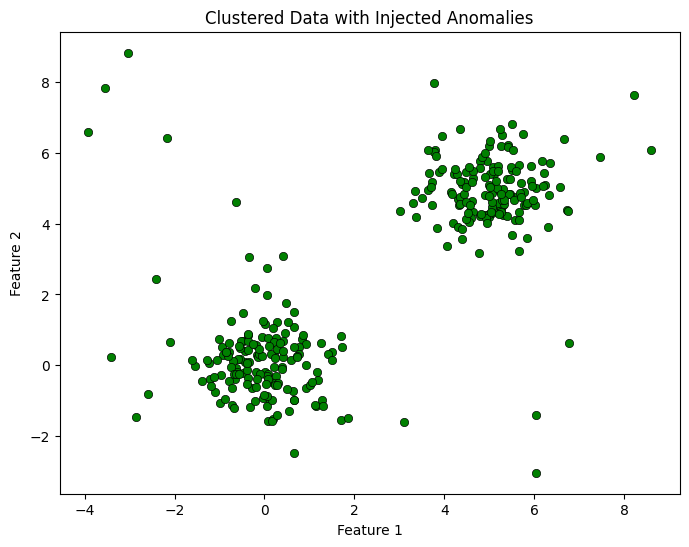

In [9]:
# 2. Inject anomalies
n_anomalies = 20
anomalies = rng.uniform(low=-4, high=9, size=(n_anomalies, 2))
# Combine
X_full = np.vstack([X, anomalies])
df = pd.DataFrame(X_full, columns=["Feature 1", "Feature 2"])
# 3. Visualize raw data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", color="green", edgecolor='k')
plt.title("Clustered Data with Injected Anomalies")
plt.show()


In [13]:
# 4. Isolation Forest
iso_model = IsolationForest(contamination=0.06, random_state=42)
df['IF_Pred'] = iso_model.fit_predict(df[["Feature 1", "Feature 2"]])

In [14]:
# 5. One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.06)  # Expect around 6% anomalies
df['SVM_Pred'] = svm_model.fit_predict(df[["Feature 1", "Feature 2"]])

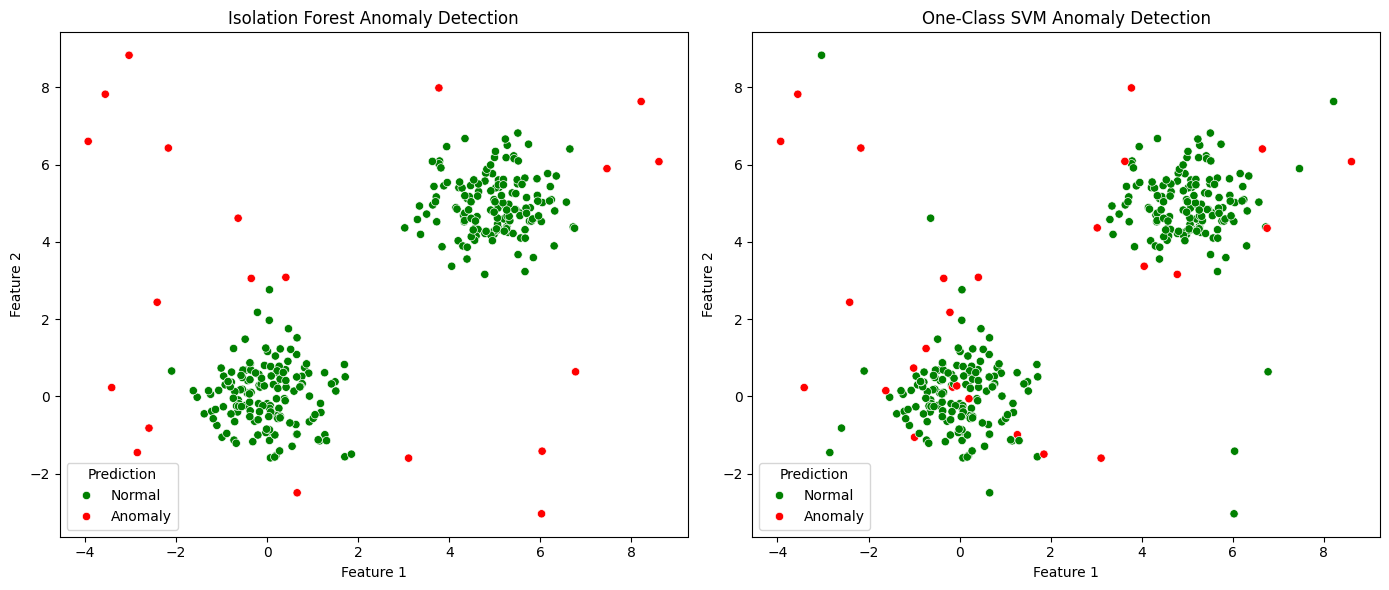

In [15]:
# --- 6. Plot results side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Convert numeric predictions to readable labels (1 -> Normal, -1 -> Anomaly)
df['IF_Pred_Label'] = df['IF_Pred'].map({1: 'Normal', -1: 'Anomaly'})
df['SVM_Pred_Label'] = df['SVM_Pred'].map({1: 'Normal', -1: 'Anomaly'})

# Isolation Forest Plot
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="IF_Pred_Label", palette={'Normal': 'green', 'Anomaly': 'red'}, ax=axes[0])
axes[0].set_title("Isolation Forest Anomaly Detection")
axes[0].legend(title="Prediction")

# One-Class SVM Plot
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="SVM_Pred_Label", palette={'Normal': 'green', 'Anomaly': 'red'}, ax=axes[1])
axes[1].set_title("One-Class SVM Anomaly Detection")
axes[1].legend(title="Prediction")

plt.tight_layout()
plt.show()
